### TMM interface matrix - temporal

In [1]:
from sympy import *
from IPython.display import Math, display

z, t, k, c = symbols('z t k c') 

n_1, n_2 = symbols('n_1 n_2')
omega_1, omega_2 = symbols('\\omega_1 \\omega_2')
D_p1, D_m1, D_p2, D_m2 = symbols('D^+_{1} D^-_{1} D^+_{2} D^-_{2}')

EQ_1 = D_p1*exp(I*omega_1*t-I*k*z) + D_m1*exp(-I*omega_1*t-I*k*z)
EQ_2 = D_p2*exp(I*omega_2*t-I*k*z) + D_m2*exp(-I*omega_2*t-I*k*z)
display(Math(latex(EQ_1)))
display(Math(latex(EQ_2)))

EQ_1 = EQ_1.subs(omega_1, k*c/n_1)
EQ_2 = EQ_2.subs(omega_2, k*c/n_2)
display(Math(latex(EQ_1)))
display(Math(latex(EQ_2)))

EQs_t0 = (EQ_1 - EQ_2).subs(t, 0)/exp(-I*k*z)
dEQs_t0 = (Derivative(EQ_1, t) - Derivative(EQ_2, t)).subs(t, 0).doit()/exp(-I*k*z)

EQs_t0 = EQs_t0.simplify()
dEQs_t0 = dEQs_t0.simplify()

display(Math(latex(EQs_t0)))
display(Math(latex(dEQs_t0)))

D_2_sub =  solve([EQs_t0, dEQs_t0], [D_p2, D_m2])
display(Math(latex(D_2_sub)))

D_p2_sub = D_2_sub[D_p2]
D_m2_sub = D_2_sub[D_m2]
display(Math(latex(D_p2)+'='+latex(D_p2_sub)))
display(Math(latex(D_m2)+'='+latex(D_m2_sub)))

a_00 = D_p2_sub.subs([(D_p1, 1), (D_m1, 0)]).simplify()
a_01 = D_p2_sub.subs([(D_p1, 0), (D_m1, 1)]).simplify()
a_10 = D_m2_sub.subs([(D_p1, 1), (D_m1, 0)]).simplify()
a_11 = D_m2_sub.subs([(D_p1, 0), (D_m1, 1)]).simplify()

IM = Matrix([[a_00, a_01],
             [a_10, a_11]])

print('Interface Matrix:')
display(Math(latex(IM)))

from sympy.utilities.lambdify import lambdastr
from Electromagnetics import Misc

IM_str = lambdastr((n_1, n_2), IM).replace('\\', '').replace('{', '').replace('}', '')
print('IM_str = \n', IM_str)

IM_str = Misc.replace_whole_word(IM_str, 'I', '1j')
IM_str = Misc.replace_whole_word(IM_str, 'MutableDenseMatrix', 'np.array')
print('IM_str = \n', IM_str)


Interface Matrix:


IM_str = 
 lambda n_1,n_2: (MutableDenseMatrix([[(n_1 + n_2)/(2*n_1), (n_1 - n_2)/(2*n_1)], [(n_1 - n_2)/(2*n_1), (n_1 + n_2)/(2*n_1)]]))
IM_str = 
 lambda n_1,n_2: (np.array([[(n_1 + n_2)/(2*n_1), (n_1 - n_2)/(2*n_1)], [(n_1 - n_2)/(2*n_1), (n_1 + n_2)/(2*n_1)]]))


In [2]:
n, k, T, omega = symbols('n k T \\omega')

PM = Matrix([[exp(+I*omega*T), 0],
             [0, exp(-I*omega*T)]])


display(Math(latex(PM)))

PM_str = lambdastr((n, T, omega), PM).replace('\\', '').replace('{', '').replace('}', '')
print('PM_str = \n', PM_str)

PM_str = Misc.replace_whole_word(PM_str, 'I', '1j')
PM_str = Misc.replace_whole_word(PM_str, 'MutableDenseMatrix', 'np.array')
print('PM_str = \n', PM_str)


PM_str = 
 lambda n,T,omega: (MutableDenseMatrix([[exp(I*T*omega), 0], [0, exp(-I*T*omega)]]))
PM_str = 
 lambda n,T,omega: (np.array([[exp(1j*T*omega), 0], [0, exp(-1j*T*omega)]]))


### Temporal slabs - numerical

[[-0.87796473-0.52813806j  0.11328988+0.19213872j]
 [ 0.11328988-0.19213872j -0.87796473+0.52813806j]]
Tp: (-0.877964731767-0.52813806476j)  ---  1.02457400205
Tm: (0.113289884034-0.192138720331j)  ---  0.22305130727
[-0.87796473-0.52813806j  0.11328988-0.19213872j]
Populating the interactive namespace from numpy and matplotlib


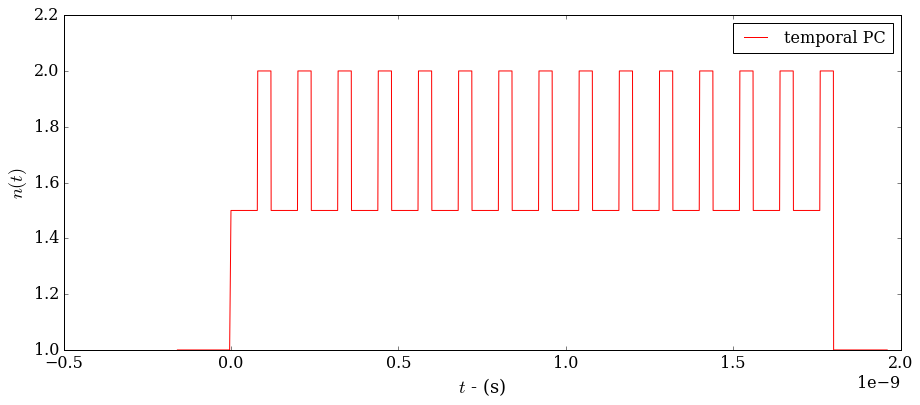

In [7]:
%reload_ext autoreload
%autoreload

import numpy as np
from scipy import constants
from Electromagnetics.TMM import *

freq = 5.0*constants.giga
l_0 = 1/freq
k_0 = 2.0*np.pi*freq/constants.c

pc = TMM_EM_N_Time(k_0)

d_ratio = 0.4
n = np.array([1.5, 2.0])
d = np.array([l_0*d_ratio, l_0*d_ratio/2])

n_layer = 15

n_p, d_p = pc.RepeatProfile(n, d, n_layer)


#print(n_p)
#print(d_p)

n_0, n_1 = 1.0, 1.0
pc.SetupMultilayer(n_0, n_1, n_p, d_p)

TM = pc.GetTMTotal()
print(TM)

Tp, Tm = pc.GetTransmissionPlusMinus()

print('Tp:', Tp, ' --- ', abs(Tp))
print('Tm:', Tm, ' --- ', abs(Tm))

print(TM.dot(np.array([1.0, 0.0])))

%pylab inline

d_sides = d[0]*2.0
n_pts_0, n_pts_1 = 40, 40
n_pts_i = 60

[z_pts, n_vec] = pc.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
figsize(15, 6)

fig = figure()
plot(z_pts, np.real(n_vec), 'r', label='temporal PC')

xlabel('$t$ - (s)', fontsize=18)
ylabel('$n(t)$', fontsize=18)
legend(loc='best', fontsize=16)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)


Populating the interactive namespace from numpy and matplotlib


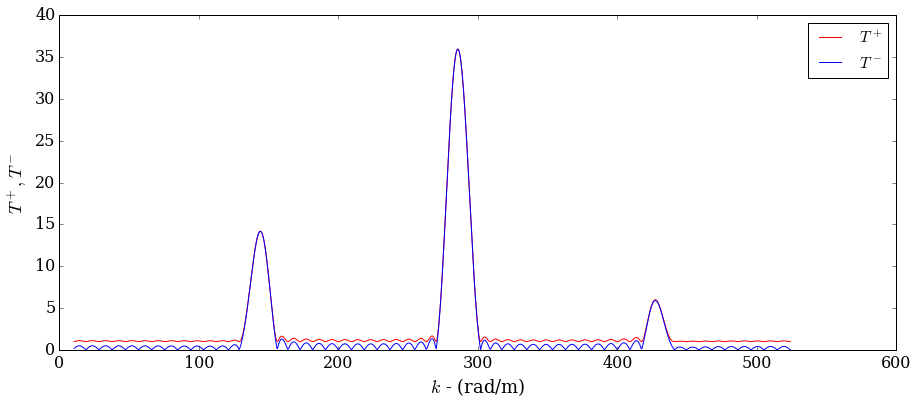

In [8]:
%pylab inline

k_1 = k_0/10
k_2 = 5.0*k_0
N = 1000

k, Tp, Tm = pc.GetTransmissionPlusMinusKBand(k_1, k_2, N)

figsize(15, 6)

plot(k, abs(Tp), 'r', label='$T^+$')
plot(k, abs(Tm), 'b', label='$T^-$')

xlabel('$k$ - (rad/m)', fontsize=18)
ylabel('$T^+, T^-$', fontsize=18)
legend(loc='best', fontsize=16)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)


Populating the interactive namespace from numpy and matplotlib


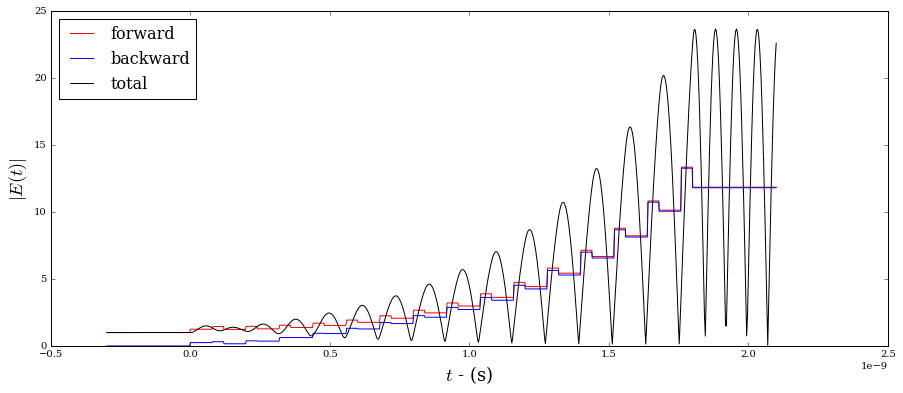

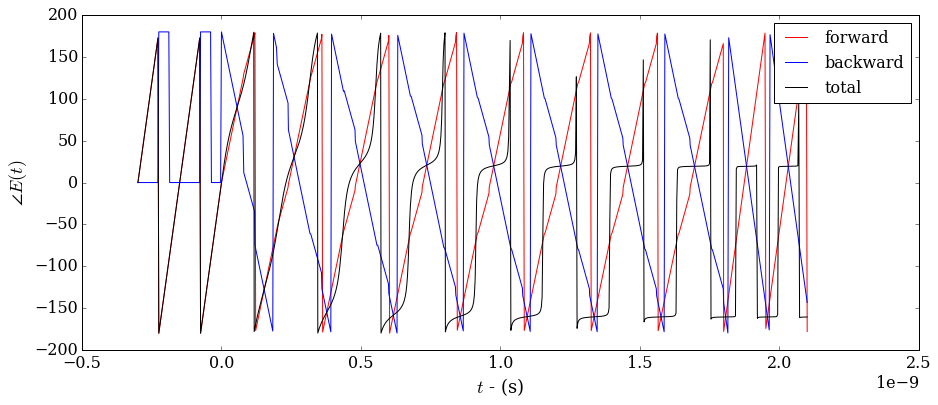

In [9]:
%pylab inline

pc.SetK(140)

[t_pts, E_FWD, E_BWD] = pc.GetFieldPlot(100, 30, 100)
            

figsize(15, 6)
plot(t_pts, np.abs(E_FWD), 'r', label='forward')
plot(t_pts, np.abs(E_BWD), 'b', label='backward')
plot(t_pts, np.abs(E_FWD+E_BWD), 'k', label='total')

xlabel('$t$ - (s)', fontsize=18)
ylabel('$|E(t)|$', fontsize=18)
legend(loc='best', fontsize=16)

show()

plot(t_pts, np.angle(E_FWD, deg=True), 'r', label='forward')
plot(t_pts, np.angle(E_BWD, deg=True), 'b', label='backward')
plot(t_pts, np.angle(E_FWD+E_BWD, deg=True), 'k', label='total')


xlabel('$t$ - (s)', fontsize=18)
ylabel('$\\angle E(t)$', fontsize=18)
legend(loc='best', fontsize=16)


font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)
